In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

%load_ext jupyter_black

In [2]:
import sys, os

sys.path.insert(0, ".")
os.chdir("..")
os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [3]:
import matplotlib.pyplot as plt
from pixel_art.display.display_domains import load_latex_dataset_and_model
from pixel_art.display.perturbations import (
    compute_perturbation_accuracy,
    run_perturbation,
)
from pixel_art.display.plot_perturbation import plot_perturbation

from pixel_art.analysis.evaluate_motifs import realign_confusion

from pixel_art.analysis.latex_experiment import latex_confusion_matrix
from pixel_art.theme import blue, orange, green, pink, darken

In [4]:
confusion, _ = realign_confusion(latex_confusion_matrix())

In [5]:
compute_perturbation_accuracy(key="digit_circle")

0.993

In [6]:
compute_perturbation_accuracy(key="latex_ocr")

0.861

In [7]:
compute_perturbation_accuracy(key="audio_mnist_sequence")

0.934

In [8]:
dataset, m = load_latex_dataset_and_model()
x, y = dataset[10]

In [9]:
start_symbol = "3"
end_symbols = "2ax"
tok, mots, mots_after, idxs = run_perturbation(
    confusion, m, x, start_symbol=start_symbol, end_symbols=end_symbols
)

[6, 20, 27]


/scratch/kavig/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(
/scratch/kavig/anaconda3/lib/python3.9/site-packages/torch/nn/functional.py:5962: UserWarning: Support for mismatched key_padding_mask and attn_mask is deprecated. Use same type for both instead.
  warnings.warn(


/mnt/md0/ExpeditionsCommon/latex-domain/./pixel_art/display/plot_perturbation.py:814: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


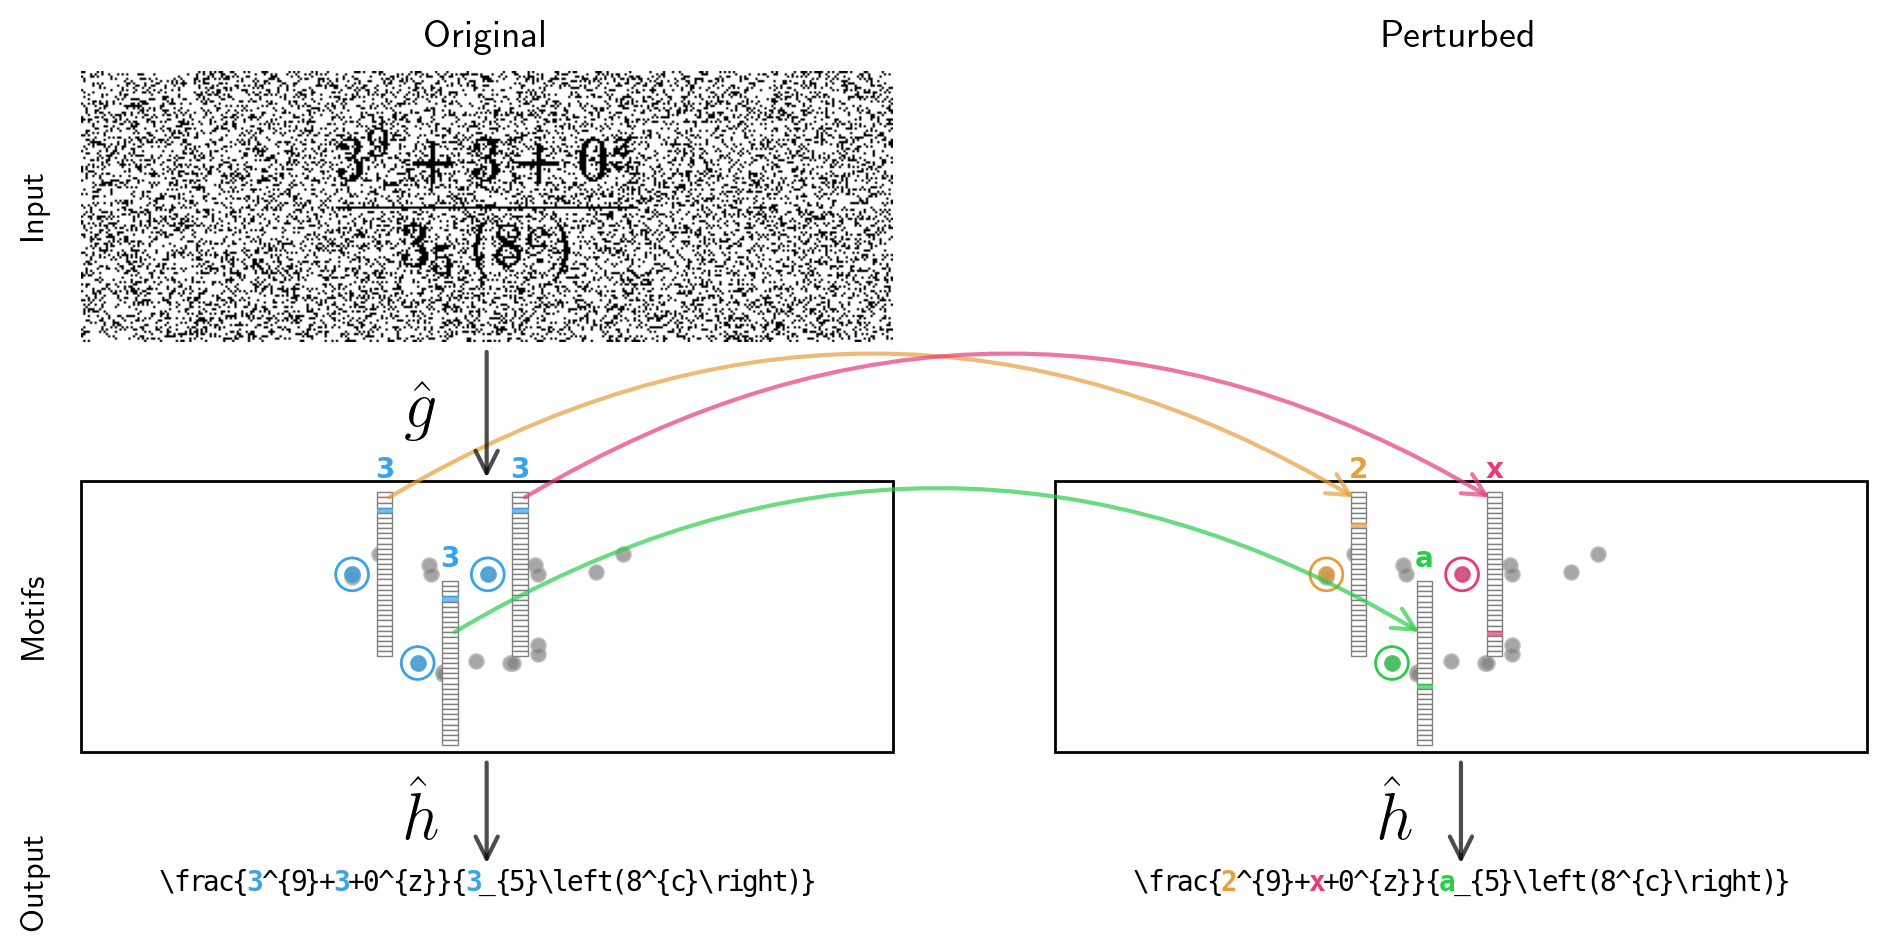

In [10]:
im = plot_perturbation(
    x,
    y,
    tok,
    mots,
    mots_after,
    idxs,
    start_symbol,
    end_symbols,
    darken(blue),
    [darken(orange), darken(green), darken(pink)],
)
im

In [11]:
im.save("output/motif-perturbation-effect-on-output.png")